# Predictive ML Model for Lower Body Injuries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt

In [8]:
# This uses the full outer-joined dataset
play_injuries = pd.read_csv('play_injuries_super.csv')

# define the random state for anything using random_state
seed = 42

In [9]:
play_injuries.head()

,PlayerGame,FieldType,Temperature,PlayerGamePlay,OutdoorStadium,WeatherImpact,DaysPlayed,InjuryDuration,IsInjured,InjuryType,...,RosterPosition_LB,RosterPosition_OL,RosterPosition_QB,RosterPosition_RB,RosterPosition_S,RosterPosition_TE,RosterPosition_WR,PlayType_Kick,PlayType_Pass,PlayType_Rush
0,1.0,1.0,63.0,1.0,1.0,0.0,64.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,63.0,2.0,1.0,0.0,64.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,63.0,3.0,1.0,0.0,64.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,63.0,4.0,1.0,0.0,64.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,63.0,5.0,1.0,0.0,64.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Prepare test training and testing sets

- The first outcome, y, will be the IsInjured column with a binary outcome. This can be used with the RandomForests for Neural Network Classifications
- The second outcome, z, for a regression analysis with multiple outcomes to classify the types of injuries, and w for the duration of the injury. For duration, it will be important to know that the injury occurred and what type

In [10]:
y = play_injuries.IsInjured
z = play_injuries.InjuryType
w = play_injuries.InjuryDuration

X = play_injuries.drop(columns=['IsInjured', 'InjuryType', 'InjuryDuration'])

For the Machine Learning Model, the following columns are encoded numerically as such: 
- Stadium Types: Outdoor = 1 , or Not Outdoor = 0
- IsInjured: NoInjury = 0, or Any Injury = 1
- Field type: Natural = 0, or synthetic = 1
- WeatherImpact:  Clear and Indoor= 0, Cloudy = 1,  Windy = 2, Hazy/Fog = 3, Rain = 4, Snow = 5 
- InjuryType: NoInjury = 0, Knee = 36, Ankle = 35, Foot = 6 (based on frequency of occurrence)
- Positions have been converted to binary: 1 = True, player plays that position
- PlayType has been converted to binary as well, where 1 is True and indicates that play was active

In [11]:
X.head()

,PlayerGame,FieldType,Temperature,PlayerGamePlay,OutdoorStadium,WeatherImpact,DaysPlayed,RosterPosition_CB,RosterPosition_DL,RosterPosition_K,RosterPosition_LB,RosterPosition_OL,RosterPosition_QB,RosterPosition_RB,RosterPosition_S,RosterPosition_TE,RosterPosition_WR,PlayType_Kick,PlayType_Pass,PlayType_Rush
0,1.0,1.0,63.0,1.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,63.0,2.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,63.0,3.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,63.0,4.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,63.0,5.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Here we look at the outcomes. There are 236000 plays during the 2 seasons, but only 69 plays resulted in injuries of the Foot, Ankle or Knee.
Because this is so imbalanced, stratify is being set = y. 

In [12]:
y.value_counts()

0    236395
1        69
Name: IsInjured, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

## Random Forest Classifier

In [14]:
# Create the Classifier
barf = BalancedRandomForestClassifier(n_estimators=100, random_state=seed)

# Fit the Model
barf.fit(X_train, y_train)

# Calculate the balanced accuracy score
y_pred = barf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5465074960235541

In [15]:
# Display the confusion Matrix
confusion_matrix(y_test, y_pred)

array([[35046, 24052],
       [    9,     9]], dtype=int64)

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


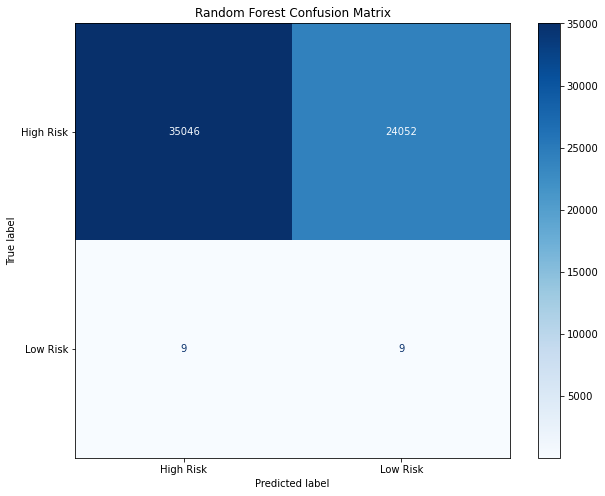

In [16]:
# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(barf, X_test, y_test, display_labels=[
                      "High Risk", "Low Risk"], cmap='Blues', values_format='d', ax=ax)
plt.title('Random Forest Confusion Matrix')
plt.show()


In [17]:
# Print imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.59      0.50      0.74      0.54      0.30     59098
          1       0.00      0.50      0.59      0.00      0.54      0.29        18

avg / total       1.00      0.59      0.50      0.74      0.54      0.30     59116



In [18]:
# List features by order of importance
sorted(zip(barf.feature_importances_, X.columns), reverse=True)

[(0.1879665548798101, 'PlayerGame'),
 (0.16103587770590963, 'DaysPlayed'),
 (0.1506151210091487, 'Temperature'),
 (0.1367398516282145, 'PlayerGamePlay'),
 (0.05749110764915886, 'WeatherImpact'),
 (0.04199587712987693, 'FieldType'),
 (0.030031195219027293, 'PlayType_Rush'),
 (0.028199945932627694, 'OutdoorStadium'),
 (0.02805189034921335, 'PlayType_Kick'),
 (0.026179020231929282, 'RosterPosition_LB'),
 (0.02617632301975161, 'PlayType_Pass'),
 (0.02452981119683056, 'RosterPosition_WR'),
 (0.024017226302496805, 'RosterPosition_OL'),
 (0.021915217517279713, 'RosterPosition_S'),
 (0.017383618890914738, 'RosterPosition_DL'),
 (0.015034503309268442, 'RosterPosition_CB'),
 (0.012467885042542839, 'RosterPosition_RB'),
 (0.004788206252826763, 'RosterPosition_QB'),
 (0.0036288972464173183, 'RosterPosition_TE'),
 (0.0017518694867549999, 'RosterPosition_K')]

- Play types seem to be grouped similar to the frequency, where whether it was a passing play or rushing play, vs. anything else, all of which had lower impact. Going to group the other plays together. 
- Positions are similar - OLB and WR are high impact with the others lower. Before grouping everyone else, going to change this to RosterPosition, rather than Actual position to see if it improves the accuracy
- These data do not contain anything about the location on the field yet, but we want to group the least impactful features before adding more features
- Weather impact seems to have a higher impact than expected - I want to look at some survey data and see how players rank the difficulty level of playing in each of those conditions before resetting the scale

## Complement Naive Bayes

In [19]:
clf = ComplementNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

balanced_accuracy_score(y_test, y_pred)


0.5465074960235541

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


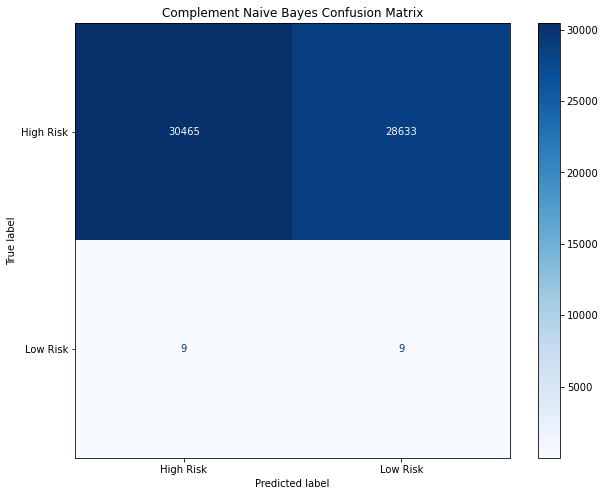

In [23]:
# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test, display_labels=[
                      "High Risk", "Low Risk"], cmap='Blues', values_format='d', ax=ax)
plt.title('Complement Naive Bayes Confusion Matrix')
plt.show()


## EasyEnsemble

In [20]:
easy_e = EasyEnsembleClassifier(n_estimators=100, random_state=seed)
easy_e.fit(X_train, y_train)

y_pred = easy_e.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5313735001372485

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


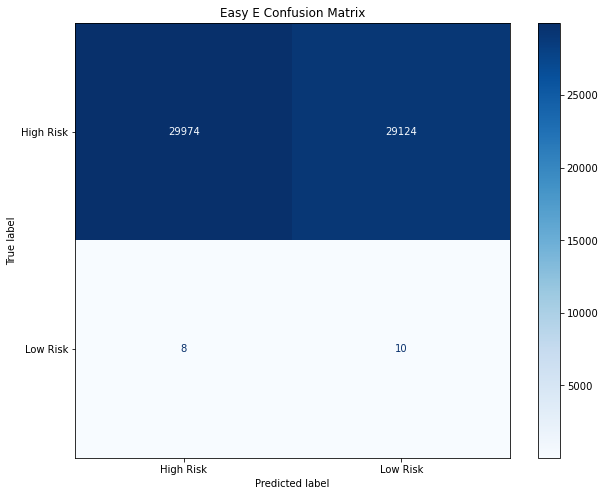

In [22]:
# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(easy_e, X_test, y_test, display_labels=[
                      "High Risk", "Low Risk"], cmap='Blues', values_format='d', ax=ax)
plt.title('Easy E Confusion Matrix')
plt.show()


## XGBoost
I'd like to try this in the future

## Summary
Our current model is wanting, and has a predictive accuracy of the binary 'IsInjured' of only 54% 